In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#  df = dataFrame
df = pd.read_csv('./AAPL.csv', parse_dates=True)
df.Date = pd.to_datetime(df.Date)

In [44]:
# 5 years apple stocks
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.696352,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.000614,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.002876,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.339447,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.274624,237458000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null datetime64[ns]
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [46]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,38.599344,38.939050,38.268752,38.619141,36.741406,1.435996e+08
std,11.002370,11.103250,10.925538,11.029897,11.319267,7.153802e+07
min,22.500000,22.917500,22.367500,22.584999,20.994093,4.544800e+07
25%,28.950001,29.130624,28.627500,28.876250,26.634759,9.512290e+07
50%,37.593750,38.012501,37.293751,37.638750,35.869709,1.263050e+08
75%,46.500627,46.845624,46.167499,46.500626,44.853702,1.714582e+08
max,72.779999,73.492500,72.379997,73.412498,72.192863,6.488252e+08


In [47]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:
# no missing values

In [49]:
# feature called Price which is the average of all these values
values = (df['High'] + df['Low'] + df['Open'] + df['Close'])/4
df = df.assign(Price=values)

In [50]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.696352,212818400,27.469375
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.000614,257142000,26.787500
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.002876,263188400,26.553750
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.339447,160423600,26.865624
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.274624,237458000,27.623125


In [51]:
training_set = df[df.Date.dt.year != 2019].Price.values

In [11]:
test_set =  df[df.Date.dt.year == 2019].Price.values

In [52]:
print("Training set size: ",training_set.size)
print("Test set size: ", test_set.size)

Training set size:  1006
Test set size:  252


In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [54]:
scaler = MinMaxScaler()

In [55]:
training_set_scaled = scaler.fit_transform(training_set.reshape(-1, 1))

In [56]:
def create_train_data(training_set_scaled):
    X_train, y_train = [], []
    for i in range(30, training_set_scaled.size):
        X_train.append(training_set_scaled[i-30: i])
        y_train.append(training_set_scaled[i])
    # Converting list to numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    return X_train, y_train

In [57]:
X_train, y_train = create_train_data(training_set_scaled)

In [58]:
def create_test_data():
    X_test = []
    inputs = df[len(df) - len(test_set) - 30:].Price.values
    inputs = scaler.transform(inputs.reshape(-1, 1))
    for i in range(30, test_set.size+30): # Range of the number of values in the training dataset
        X_test.append(inputs[i - 30: i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    return X_test

In [59]:
X_test = create_test_data()

In [60]:
X_test.shape

(252, 30, 1)

In [61]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [62]:
def create_simple_model():
    model = Sequential()
    model.add(LSTM(units = 10, return_sequences = False, input_shape = (X_train.shape[1], 1)))
    model.add(Dense(units = 1))
    return model

In [63]:
def compile_and_run(model, epochs=50, batch_size=64):
    model.compile(metrics=['accuracy'], optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=3)
    score = model.evaluate(X_train, y_train, verbose=0)
    return history, score

In [64]:
def plot_metrics(history):
    metrics_df = pd.DataFrame(data={"loss": history.history['loss']})
    metrics_df.plot()

In [65]:
simple_model = create_simple_model()
history, score = compile_and_run(simple_model, epochs=20)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


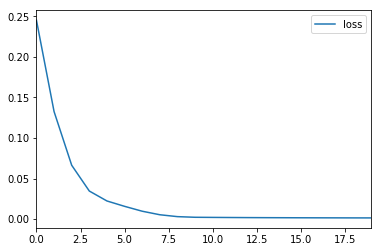

In [66]:
plot_metrics(history)

In [67]:
# Simple LSTM MSE
print('Keras model loss = ', score[0])
print('Keras model accuracy = ', score[1])

Keras model loss =  0.001419123844243586
Keras model accuracy =  0.0020491802133619785


In [68]:
def make_predictions(X_test, model):
    y_pred = model.predict(X_test)
    final_predictions = scaler.inverse_transform(y_pred)
    fp = np.ndarray.flatten(final_predictions)
    ap = np.ndarray.flatten(test_set)
    pdf = pd.DataFrame(data={'Actual': ap, 'Predicted': fp})
    ax = pdf.plot()
    return ap, fp

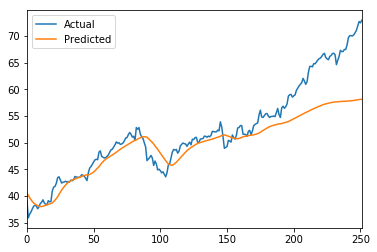

In [69]:
ap, fp = make_predictions(X_test, simple_model)

In [71]:
df = pd.DataFrame({'Actual Values':ap, 'Predicted Values':fp})

error = mean_squared_error(ap, fp)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 21.015


In [29]:
# Deep neural nets can capture trends over a largely spread dataset and could improve our model. For this problem of forecasting, we will use a stacked LSTM(i.e multiple LSTM layers instead of 1). Further, we will also increase the number of units per LSTM cell to 50.

In [72]:
def create_dl_model():
    model = Sequential()

    # Adding the first LSTM layer
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

    # Adding a second LSTM layer
    model.add(LSTM(units = 50, return_sequences = True))
    
    # Adding a third LSTM layer
    model.add(LSTM(units = 50, return_sequences = True))

    # Adding a fourth LSTM layer
    model.add(LSTM(units = 50))

    # Adding the output layer
    model.add(Dense(units = 1))
    return model

In [73]:
dl_model = create_dl_model()

In [74]:
dl_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [75]:
history, score = compile_and_run(dl_model, epochs=20)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


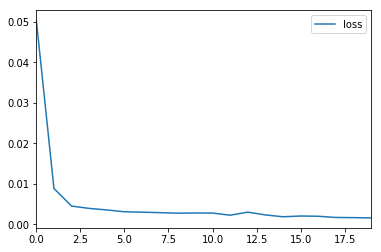

In [80]:
plot_metrics(history)

In [81]:
print('Keras model loss = ', score[0])
print('Keras model accuracy = ', score[1])

Keras model loss =  0.0016539770876988769
Keras model accuracy =  0.0020491802133619785


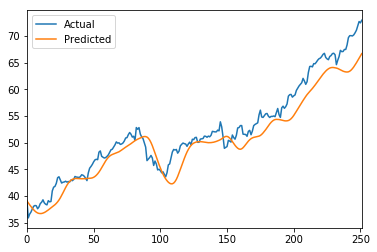

In [82]:
ap, fp = make_predictions(X_test, dl_model)

In [83]:
df = pd.DataFrame({'Actual Values':ap, 'Predicted Values':fp})

error = mean_squared_error(ap, fp)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 7.977
